# Keras - Dense neural network (Advanced)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 66 columns):
YVIK-YtreVikna1.-G1-T4015A3 -0104    4954 non-null float64
RRS.S2502.Gunit.M1 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G2-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M2 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G3-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M3 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G4-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M4 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G5-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M5 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G6-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M6 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G7-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M7 G1.AVL            5237 non-null int64
YVIK-YtreVikna1.-G8-T4015A3 -0104    5222 non-null float64
RRS.S2502.Gunit.M8 G1.

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 5 to 5236
Data columns (total 66 columns):
YVIK-YtreVikna1.-G1-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M1 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G2-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M2 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G3-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M3 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G4-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M4 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G5-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M5 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G6-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M6 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G7-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M7 G1.AVL            4895 non-null int64
YVIK-YtreVikna1.-G8-T4015A3 -0104    4895 non-null float64
RRS.S2502.Gunit.M8 G1.

In [4]:
num_features = len(data.columns) -1
print(num_features)

65


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Train/test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

#### Skalere data

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3426 samples, validate on 1469 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 9.34498, saving model to checkpoint_model_advanced.h5
0s - loss: 10.5270 - val_loss: 9.3450
Epoch 2/10000
Epoch 00001: val_loss improved from 9.34498 to 7.49783, saving model to checkpoint_model_advanced.h5
0s - loss: 8.3783 - val_loss: 7.4978
Epoch 3/10000
Epoch 00002: val_loss improved from 7.49783 to 4.93442, saving model to checkpoint_model_advanced.h5
0s - loss: 6.3572 - val_loss: 4.9344
Epoch 4/10000
Epoch 00003: val_loss improved from 4.93442 to 4.59850, saving model to checkpoint_model_advanced.h5
0s - loss: 4.4942 - val_loss: 4.5985
Epoch 5/10000
Epoch 00004: val_loss improved from 4.59850 to 4.21734, saving model to checkpoint_model_advanced.h5
0s - loss: 4.4541 - val_loss: 4.2173
Epoch 6/10000
Epoch 00005: val_loss improved from 4.21734 to 3.56937, saving model to checkpoint_model_advanced.h5
0s - loss: 4.0196 - val_loss: 3.5694
Epoch 7/10000
Epoch 00006: val_loss improve

Epoch 00078: val_loss did not improve
0s - loss: 3.1057 - val_loss: 3.0309
Epoch 80/10000
Epoch 00079: val_loss did not improve
0s - loss: 3.0129 - val_loss: 2.7126
Epoch 81/10000
Epoch 00080: val_loss did not improve
0s - loss: 2.9795 - val_loss: 3.5507
Epoch 82/10000
Epoch 00081: val_loss did not improve
0s - loss: 2.9950 - val_loss: 2.7234
Epoch 83/10000
Epoch 00082: val_loss did not improve
0s - loss: 2.9450 - val_loss: 2.8334
Epoch 84/10000
Epoch 00083: val_loss did not improve
0s - loss: 3.0660 - val_loss: 3.0177
Epoch 85/10000
Epoch 00084: val_loss improved from 2.70193 to 2.69268, saving model to checkpoint_model_advanced.h5
0s - loss: 2.9958 - val_loss: 2.6927
Epoch 86/10000
Epoch 00085: val_loss did not improve
0s - loss: 2.9282 - val_loss: 3.0013
Epoch 87/10000
Epoch 00086: val_loss improved from 2.69268 to 2.68499, saving model to checkpoint_model_advanced.h5
0s - loss: 2.9535 - val_loss: 2.6850
Epoch 88/10000
Epoch 00087: val_loss did not improve
0s - loss: 2.8628 - val_lo

Epoch 00165: val_loss did not improve
0s - loss: 2.9749 - val_loss: 2.7750
Epoch 167/10000
Epoch 00166: val_loss did not improve
0s - loss: 2.8351 - val_loss: 2.8858
Epoch 168/10000
Epoch 00167: val_loss did not improve
0s - loss: 2.9077 - val_loss: 2.6831
Epoch 169/10000
Epoch 00168: val_loss did not improve
0s - loss: 2.9452 - val_loss: 2.6271
Epoch 170/10000
Epoch 00169: val_loss did not improve
0s - loss: 2.8274 - val_loss: 2.6528
Epoch 171/10000
Epoch 00170: val_loss did not improve
0s - loss: 2.8390 - val_loss: 2.6177
Epoch 172/10000
Epoch 00171: val_loss did not improve
0s - loss: 2.8184 - val_loss: 2.7636
Epoch 173/10000
Epoch 00172: val_loss did not improve
0s - loss: 2.8774 - val_loss: 2.7419
Epoch 174/10000
Epoch 00173: val_loss did not improve
0s - loss: 2.8749 - val_loss: 2.6219
Epoch 175/10000
Epoch 00174: val_loss did not improve
0s - loss: 2.8227 - val_loss: 2.6327
Epoch 176/10000
Epoch 00175: val_loss did not improve
0s - loss: 2.8474 - val_loss: 2.6044
Epoch 177/10000

Epoch 00256: val_loss did not improve
0s - loss: 2.8033 - val_loss: 2.5535
Epoch 258/10000
Epoch 00257: val_loss did not improve
0s - loss: 2.7917 - val_loss: 2.5629
Epoch 259/10000
Epoch 00258: val_loss did not improve
0s - loss: 2.7486 - val_loss: 2.6149
Epoch 260/10000
Epoch 00259: val_loss did not improve
0s - loss: 2.7049 - val_loss: 2.5846
Epoch 261/10000
Epoch 00260: val_loss did not improve
0s - loss: 2.7353 - val_loss: 2.5502
Epoch 262/10000
Epoch 00261: val_loss did not improve
0s - loss: 2.7398 - val_loss: 2.9747
Epoch 263/10000
Epoch 00262: val_loss did not improve
0s - loss: 2.7741 - val_loss: 2.5398
Epoch 264/10000
Epoch 00263: val_loss did not improve
0s - loss: 2.7779 - val_loss: 2.5514
Epoch 265/10000
Epoch 00264: val_loss did not improve
0s - loss: 2.7375 - val_loss: 2.5602
Epoch 266/10000
Epoch 00265: val_loss did not improve
0s - loss: 2.8081 - val_loss: 3.1124
Epoch 267/10000
Epoch 00266: val_loss did not improve
0s - loss: 2.7396 - val_loss: 2.6190
Epoch 268/10000

Epoch 00345: val_loss did not improve
0s - loss: 2.7779 - val_loss: 2.6383
Epoch 347/10000
Epoch 00346: val_loss improved from 2.50517 to 2.50096, saving model to checkpoint_model_advanced.h5
0s - loss: 2.7350 - val_loss: 2.5010
Epoch 348/10000
Epoch 00347: val_loss improved from 2.50096 to 2.49751, saving model to checkpoint_model_advanced.h5
0s - loss: 2.6948 - val_loss: 2.4975
Epoch 349/10000
Epoch 00348: val_loss did not improve
0s - loss: 2.7035 - val_loss: 3.1574
Epoch 350/10000
Epoch 00349: val_loss did not improve
0s - loss: 2.7778 - val_loss: 2.5925
Epoch 351/10000
Epoch 00350: val_loss did not improve
0s - loss: 2.7658 - val_loss: 2.5231
Epoch 352/10000
Epoch 00351: val_loss did not improve
0s - loss: 2.6521 - val_loss: 2.5298
Epoch 353/10000
Epoch 00352: val_loss did not improve
0s - loss: 2.6799 - val_loss: 2.8045
Epoch 354/10000
Epoch 00353: val_loss did not improve
0s - loss: 2.6606 - val_loss: 2.6672
Epoch 355/10000
Epoch 00354: val_loss improved from 2.49751 to 2.49308,

Epoch 00431: val_loss did not improve
0s - loss: 2.6962 - val_loss: 2.7032
Epoch 433/10000
Epoch 00432: val_loss did not improve
0s - loss: 2.7390 - val_loss: 2.5705
Epoch 434/10000
Epoch 00433: val_loss did not improve
0s - loss: 2.6296 - val_loss: 2.4917
Epoch 435/10000
Epoch 00434: val_loss did not improve
0s - loss: 2.6124 - val_loss: 2.7065
Epoch 436/10000
Epoch 00435: val_loss did not improve
0s - loss: 2.6464 - val_loss: 2.5618
Epoch 437/10000
Epoch 00436: val_loss did not improve
0s - loss: 2.5944 - val_loss: 2.7530
Epoch 438/10000
Epoch 00437: val_loss did not improve
0s - loss: 2.7026 - val_loss: 2.4846
Epoch 439/10000
Epoch 00438: val_loss did not improve
0s - loss: 2.7092 - val_loss: 2.8059
Epoch 440/10000
Epoch 00439: val_loss did not improve
0s - loss: 2.7482 - val_loss: 2.7335
Epoch 441/10000
Epoch 00440: val_loss did not improve
0s - loss: 2.8577 - val_loss: 2.4981
Epoch 442/10000
Epoch 00441: val_loss did not improve
0s - loss: 2.6479 - val_loss: 2.5057
Epoch 443/10000

Epoch 00521: val_loss did not improve
0s - loss: 2.6275 - val_loss: 2.6228
Epoch 523/10000
Epoch 00522: val_loss did not improve
0s - loss: 2.6183 - val_loss: 2.5778
Epoch 524/10000
Epoch 00523: val_loss did not improve
0s - loss: 2.7273 - val_loss: 2.7436
Epoch 525/10000
Epoch 00524: val_loss did not improve
0s - loss: 2.5971 - val_loss: 2.7886
Epoch 526/10000
Epoch 00525: val_loss did not improve
0s - loss: 2.7677 - val_loss: 2.5348
Epoch 527/10000
Epoch 00526: val_loss did not improve
0s - loss: 2.5551 - val_loss: 2.4933
Epoch 528/10000
Epoch 00527: val_loss did not improve
0s - loss: 2.5775 - val_loss: 3.1489
Epoch 529/10000
Epoch 00528: val_loss did not improve
0s - loss: 2.7723 - val_loss: 2.5172
Epoch 530/10000
Epoch 00529: val_loss did not improve
0s - loss: 2.6006 - val_loss: 2.5149
Epoch 531/10000
Epoch 00530: val_loss did not improve
0s - loss: 2.5649 - val_loss: 2.5066
Epoch 532/10000
Epoch 00531: val_loss did not improve
0s - loss: 2.6097 - val_loss: 2.5718
Epoch 533/10000

Epoch 00614: val_loss did not improve
0s - loss: 2.6698 - val_loss: 2.5443
Epoch 616/10000
Epoch 00615: val_loss did not improve
0s - loss: 2.5384 - val_loss: 2.6878
Epoch 617/10000
Epoch 00616: val_loss did not improve
0s - loss: 2.6180 - val_loss: 2.7758
Epoch 618/10000
Epoch 00617: val_loss did not improve
0s - loss: 2.7247 - val_loss: 2.5828
Epoch 619/10000
Epoch 00618: val_loss did not improve
0s - loss: 2.6056 - val_loss: 2.8201
Epoch 620/10000
Epoch 00619: val_loss did not improve
0s - loss: 2.5874 - val_loss: 2.5027
Epoch 621/10000
Epoch 00620: val_loss did not improve
0s - loss: 2.6348 - val_loss: 2.9196
Epoch 622/10000
Epoch 00621: val_loss improved from 2.44657 to 2.44474, saving model to checkpoint_model_advanced.h5
0s - loss: 2.5826 - val_loss: 2.4447
Epoch 623/10000
Epoch 00622: val_loss did not improve
0s - loss: 2.5403 - val_loss: 2.4995
Epoch 624/10000
Epoch 00623: val_loss did not improve
0s - loss: 2.5040 - val_loss: 2.5525
Epoch 625/10000
Epoch 00624: val_loss did n

Epoch 00704: val_loss did not improve
0s - loss: 2.5165 - val_loss: 2.4583
Epoch 706/10000
Epoch 00705: val_loss did not improve
0s - loss: 2.5664 - val_loss: 2.5057
Epoch 707/10000
Epoch 00706: val_loss did not improve
0s - loss: 2.5826 - val_loss: 2.5972
Epoch 708/10000
Epoch 00707: val_loss did not improve
0s - loss: 2.5455 - val_loss: 2.5331
Epoch 709/10000
Epoch 00708: val_loss did not improve
0s - loss: 2.5370 - val_loss: 2.6548
Epoch 710/10000
Epoch 00709: val_loss did not improve
0s - loss: 2.5931 - val_loss: 2.5862
Epoch 711/10000
Epoch 00710: val_loss did not improve
0s - loss: 2.6708 - val_loss: 2.6074
Epoch 712/10000
Epoch 00711: val_loss did not improve
0s - loss: 2.5409 - val_loss: 2.6073
Epoch 713/10000
Epoch 00712: val_loss did not improve
0s - loss: 2.5537 - val_loss: 2.6638
Epoch 714/10000
Epoch 00713: val_loss did not improve
0s - loss: 2.5682 - val_loss: 2.5460
Epoch 715/10000
Epoch 00714: val_loss did not improve
0s - loss: 2.5950 - val_loss: 2.4603
Epoch 716/10000

Epoch 00796: val_loss did not improve
0s - loss: 2.5120 - val_loss: 2.4545
Epoch 798/10000
Epoch 00797: val_loss did not improve
0s - loss: 2.4292 - val_loss: 2.4756
Epoch 799/10000
Epoch 00798: val_loss did not improve
0s - loss: 2.5242 - val_loss: 2.6602
Epoch 800/10000
Epoch 00799: val_loss did not improve
0s - loss: 2.5067 - val_loss: 2.5955
Epoch 801/10000
Epoch 00800: val_loss did not improve
0s - loss: 2.4910 - val_loss: 2.5833
Epoch 802/10000
Epoch 00801: val_loss did not improve
0s - loss: 2.6086 - val_loss: 2.5435
Epoch 803/10000
Epoch 00802: val_loss did not improve
0s - loss: 2.5053 - val_loss: 2.4778
Epoch 804/10000
Epoch 00803: val_loss improved from 2.42091 to 2.41745, saving model to checkpoint_model_advanced.h5
0s - loss: 2.4732 - val_loss: 2.4174
Epoch 805/10000
Epoch 00804: val_loss did not improve
0s - loss: 2.5066 - val_loss: 2.6392
Epoch 806/10000
Epoch 00805: val_loss did not improve
0s - loss: 2.4650 - val_loss: 2.4735
Epoch 807/10000
Epoch 00806: val_loss did n

Epoch 00887: val_loss did not improve
0s - loss: 2.5484 - val_loss: 2.5636
Epoch 889/10000
Epoch 00888: val_loss did not improve
0s - loss: 2.4651 - val_loss: 2.4606
Epoch 890/10000
Epoch 00889: val_loss did not improve
0s - loss: 2.4584 - val_loss: 2.7510
Epoch 891/10000
Epoch 00890: val_loss did not improve
0s - loss: 2.5928 - val_loss: 2.9329
Epoch 892/10000
Epoch 00891: val_loss did not improve
0s - loss: 2.5140 - val_loss: 2.5019
Epoch 893/10000
Epoch 00892: val_loss did not improve
0s - loss: 2.5143 - val_loss: 2.5300
Epoch 894/10000
Epoch 00893: val_loss did not improve
0s - loss: 2.4138 - val_loss: 2.4820
Epoch 895/10000
Epoch 00894: val_loss did not improve
0s - loss: 2.4353 - val_loss: 2.4472
Epoch 896/10000
Epoch 00895: val_loss did not improve
0s - loss: 2.4583 - val_loss: 2.5171
Epoch 897/10000
Epoch 00896: val_loss did not improve
0s - loss: 2.5624 - val_loss: 2.6228
Epoch 898/10000
Epoch 00897: val_loss did not improve
0s - loss: 2.5477 - val_loss: 2.5031
Epoch 899/10000

Epoch 00978: val_loss did not improve
0s - loss: 2.5032 - val_loss: 2.5214
Epoch 980/10000
Epoch 00979: val_loss did not improve
0s - loss: 2.4769 - val_loss: 2.4365
Epoch 981/10000
Epoch 00980: val_loss did not improve
0s - loss: 2.4335 - val_loss: 2.4921
Epoch 982/10000
Epoch 00981: val_loss did not improve
0s - loss: 2.4564 - val_loss: 2.6380
Epoch 983/10000
Epoch 00982: val_loss did not improve
0s - loss: 2.4332 - val_loss: 2.4557
Epoch 984/10000
Epoch 00983: val_loss did not improve
0s - loss: 2.4196 - val_loss: 2.6131
Epoch 985/10000
Epoch 00984: val_loss did not improve
0s - loss: 2.4000 - val_loss: 2.4654
Epoch 986/10000
Epoch 00985: val_loss did not improve
0s - loss: 2.4967 - val_loss: 2.6642
Epoch 987/10000
Epoch 00986: val_loss did not improve
0s - loss: 2.5110 - val_loss: 2.6094
Epoch 988/10000
Epoch 00987: val_loss did not improve
0s - loss: 2.4072 - val_loss: 2.4484
Epoch 989/10000
Epoch 00988: val_loss did not improve
0s - loss: 2.4086 - val_loss: 2.4411
Epoch 990/10000

Epoch 01069: val_loss did not improve
0s - loss: 2.3912 - val_loss: 2.4591
Epoch 1071/10000
Epoch 01070: val_loss did not improve
0s - loss: 2.3847 - val_loss: 2.4329
Epoch 1072/10000
Epoch 01071: val_loss did not improve
0s - loss: 2.5224 - val_loss: 3.0671
Epoch 1073/10000
Epoch 01072: val_loss did not improve
0s - loss: 2.5012 - val_loss: 2.5611
Epoch 1074/10000
Epoch 01073: val_loss did not improve
0s - loss: 2.3796 - val_loss: 2.5145
Epoch 1075/10000
Epoch 01074: val_loss did not improve
0s - loss: 2.4230 - val_loss: 2.4955
Epoch 1076/10000
Epoch 01075: val_loss did not improve
0s - loss: 2.3710 - val_loss: 2.8157
Epoch 1077/10000
Epoch 01076: val_loss did not improve
0s - loss: 2.4617 - val_loss: 2.4100
Epoch 1078/10000
Epoch 01077: val_loss did not improve
0s - loss: 2.3649 - val_loss: 2.4461
Epoch 1079/10000
Epoch 01078: val_loss did not improve
0s - loss: 2.5160 - val_loss: 2.6044
Epoch 1080/10000
Epoch 01079: val_loss did not improve
0s - loss: 2.4995 - val_loss: 2.5015
Epoch

Epoch 01161: val_loss did not improve
0s - loss: 2.3965 - val_loss: 2.5548
Epoch 1163/10000
Epoch 01162: val_loss did not improve
0s - loss: 2.4700 - val_loss: 2.6092
Epoch 1164/10000
Epoch 01163: val_loss did not improve
0s - loss: 2.3852 - val_loss: 2.4993
Epoch 1165/10000
Epoch 01164: val_loss did not improve
0s - loss: 2.4074 - val_loss: 2.4295
Epoch 1166/10000
Epoch 01165: val_loss did not improve
0s - loss: 2.3563 - val_loss: 2.4435
Epoch 1167/10000
Epoch 01166: val_loss did not improve
0s - loss: 2.3201 - val_loss: 2.4599
Epoch 1168/10000
Epoch 01167: val_loss did not improve
0s - loss: 2.4759 - val_loss: 2.5400
Epoch 1169/10000
Epoch 01168: val_loss did not improve
0s - loss: 2.4208 - val_loss: 2.4314
Epoch 1170/10000
Epoch 01169: val_loss did not improve
0s - loss: 2.3236 - val_loss: 2.4685
Epoch 1171/10000
Epoch 01170: val_loss did not improve
0s - loss: 2.4235 - val_loss: 2.5261
Epoch 1172/10000
Epoch 01171: val_loss did not improve
0s - loss: 2.4000 - val_loss: 2.4398
Epoch

Epoch 01253: val_loss did not improve
0s - loss: 2.3078 - val_loss: 2.6603
Epoch 1255/10000
Epoch 01254: val_loss did not improve
0s - loss: 2.3766 - val_loss: 2.4884
Epoch 1256/10000
Epoch 01255: val_loss did not improve
0s - loss: 2.3667 - val_loss: 2.9564
Epoch 1257/10000
Epoch 01256: val_loss did not improve
0s - loss: 2.5051 - val_loss: 2.4797
Epoch 1258/10000
Epoch 01257: val_loss did not improve
0s - loss: 2.4279 - val_loss: 2.4213
Epoch 1259/10000
Epoch 01258: val_loss did not improve
0s - loss: 2.3903 - val_loss: 2.5885
Epoch 1260/10000
Epoch 01259: val_loss did not improve
0s - loss: 2.3122 - val_loss: 2.4408
Epoch 1261/10000
Epoch 01260: val_loss did not improve
0s - loss: 2.3046 - val_loss: 2.6664
Epoch 1262/10000
Epoch 01261: val_loss did not improve
0s - loss: 2.4034 - val_loss: 2.4648
Epoch 1263/10000
Epoch 01262: val_loss did not improve
0s - loss: 2.3299 - val_loss: 2.5276
Epoch 1264/10000
Epoch 01263: val_loss did not improve
0s - loss: 2.4271 - val_loss: 2.4880
Epoch

Epoch 01344: val_loss did not improve
0s - loss: 2.3125 - val_loss: 2.4952
Epoch 1346/10000
Epoch 01345: val_loss did not improve
0s - loss: 2.3088 - val_loss: 2.4262
Epoch 1347/10000
Epoch 01346: val_loss did not improve
0s - loss: 2.2944 - val_loss: 2.6296
Epoch 1348/10000
Epoch 01347: val_loss did not improve
0s - loss: 2.3913 - val_loss: 2.5230
Epoch 1349/10000
Epoch 01348: val_loss did not improve
0s - loss: 2.3398 - val_loss: 2.4327
Epoch 1350/10000
Epoch 01349: val_loss did not improve
0s - loss: 2.3605 - val_loss: 2.6187
Epoch 1351/10000
Epoch 01350: val_loss did not improve
0s - loss: 2.4209 - val_loss: 2.6332
Epoch 1352/10000
Epoch 01351: val_loss did not improve
0s - loss: 2.3326 - val_loss: 2.4442
Epoch 1353/10000
Epoch 01352: val_loss did not improve
0s - loss: 2.4120 - val_loss: 2.4357
Epoch 1354/10000
Epoch 01353: val_loss did not improve
0s - loss: 2.3190 - val_loss: 2.4356
Epoch 1355/10000
Epoch 01354: val_loss did not improve
0s - loss: 2.3384 - val_loss: 2.4780
Epoch

Epoch 01436: val_loss did not improve
0s - loss: 2.3233 - val_loss: 2.4516
Epoch 1438/10000
Epoch 01437: val_loss did not improve
0s - loss: 2.3165 - val_loss: 2.4945
Epoch 1439/10000
Epoch 01438: val_loss did not improve
0s - loss: 2.3223 - val_loss: 2.5193
Epoch 1440/10000
Epoch 01439: val_loss did not improve
0s - loss: 2.4296 - val_loss: 2.5344
Epoch 1441/10000
Epoch 01440: val_loss did not improve
0s - loss: 2.2933 - val_loss: 2.5479
Epoch 1442/10000
Epoch 01441: val_loss did not improve
0s - loss: 2.2655 - val_loss: 2.4570
Epoch 1443/10000
Epoch 01442: val_loss did not improve
0s - loss: 2.3210 - val_loss: 2.4237
Epoch 1444/10000
Epoch 01443: val_loss did not improve
0s - loss: 2.3667 - val_loss: 2.8906
Epoch 1445/10000
Epoch 01444: val_loss did not improve
0s - loss: 2.3436 - val_loss: 2.5573
Epoch 1446/10000
Epoch 01445: val_loss did not improve
0s - loss: 2.3062 - val_loss: 2.4291
Epoch 1447/10000
Epoch 01446: val_loss did not improve
0s - loss: 2.3123 - val_loss: 2.4760
Epoch

Epoch 01528: val_loss did not improve
0s - loss: 2.3284 - val_loss: 2.5843
Epoch 1530/10000
Epoch 01529: val_loss did not improve
0s - loss: 2.4420 - val_loss: 2.7368
Epoch 1531/10000
Epoch 01530: val_loss did not improve
0s - loss: 2.4074 - val_loss: 2.4408
Epoch 1532/10000
Epoch 01531: val_loss did not improve
0s - loss: 2.2715 - val_loss: 2.4846
Epoch 1533/10000
Epoch 01532: val_loss did not improve
0s - loss: 2.3892 - val_loss: 2.4923
Epoch 1534/10000
Epoch 01533: val_loss did not improve
0s - loss: 2.2851 - val_loss: 2.4258
Epoch 1535/10000
Epoch 01534: val_loss did not improve
0s - loss: 2.3471 - val_loss: 2.4739
Epoch 1536/10000
Epoch 01535: val_loss did not improve
0s - loss: 2.3169 - val_loss: 2.4447
Epoch 1537/10000
Epoch 01536: val_loss did not improve
0s - loss: 2.3949 - val_loss: 2.6378
Epoch 1538/10000
Epoch 01537: val_loss did not improve
0s - loss: 2.2823 - val_loss: 2.5009
Epoch 1539/10000
Epoch 01538: val_loss did not improve
0s - loss: 2.2856 - val_loss: 2.4737
Epoch

Epoch 01619: val_loss did not improve
0s - loss: 2.2657 - val_loss: 2.4113
Epoch 1621/10000
Epoch 01620: val_loss did not improve
0s - loss: 2.2683 - val_loss: 2.4364
Epoch 1622/10000
Epoch 01621: val_loss did not improve
0s - loss: 2.2987 - val_loss: 2.8498
Epoch 1623/10000
Epoch 01622: val_loss did not improve
0s - loss: 2.3482 - val_loss: 2.4073
Epoch 1624/10000
Epoch 01623: val_loss did not improve
0s - loss: 2.3645 - val_loss: 3.1948
Epoch 1625/10000
Epoch 01624: val_loss did not improve
0s - loss: 2.6503 - val_loss: 2.4893
Epoch 1626/10000
Epoch 01625: val_loss did not improve
0s - loss: 2.3996 - val_loss: 2.5202
Epoch 1627/10000
Epoch 01626: val_loss did not improve
0s - loss: 2.3037 - val_loss: 2.5185
Epoch 1628/10000
Epoch 01627: val_loss did not improve
0s - loss: 2.3045 - val_loss: 2.4755
Epoch 1629/10000
Epoch 01628: val_loss did not improve
0s - loss: 2.2568 - val_loss: 2.7462
Epoch 1630/10000
Epoch 01629: val_loss did not improve
0s - loss: 2.4074 - val_loss: 2.6079
Epoch

Epoch 01711: val_loss did not improve
0s - loss: 2.2399 - val_loss: 2.5623
Epoch 1713/10000
Epoch 01712: val_loss did not improve
0s - loss: 2.2969 - val_loss: 2.6365
Epoch 1714/10000
Epoch 01713: val_loss did not improve
0s - loss: 2.2668 - val_loss: 2.6081
Epoch 1715/10000
Epoch 01714: val_loss did not improve
0s - loss: 2.2297 - val_loss: 2.5115
Epoch 1716/10000
Epoch 01715: val_loss did not improve
0s - loss: 2.2572 - val_loss: 2.4340
Epoch 1717/10000
Epoch 01716: val_loss did not improve
0s - loss: 2.2753 - val_loss: 2.4708
Epoch 1718/10000
Epoch 01717: val_loss did not improve
0s - loss: 2.2734 - val_loss: 2.4283
Epoch 1719/10000
Epoch 01718: val_loss did not improve
0s - loss: 2.4414 - val_loss: 2.6375
Epoch 1720/10000
Epoch 01719: val_loss did not improve
0s - loss: 2.3169 - val_loss: 2.7278
Epoch 1721/10000
Epoch 01720: val_loss did not improve
0s - loss: 2.2709 - val_loss: 2.5408
Epoch 1722/10000
Epoch 01721: val_loss did not improve
0s - loss: 2.4208 - val_loss: 2.4943
Epoch

Epoch 01803: val_loss did not improve
0s - loss: 2.2335 - val_loss: 2.4370
Epoch 1805/10000
Epoch 01804: val_loss did not improve
0s - loss: 2.2569 - val_loss: 2.4386
Epoch 1806/10000
Epoch 01805: val_loss did not improve
0s - loss: 2.3761 - val_loss: 2.4276
Epoch 1807/10000
Epoch 01806: val_loss did not improve
0s - loss: 2.2392 - val_loss: 2.4940
Epoch 1808/10000
Epoch 01807: val_loss did not improve
0s - loss: 2.2293 - val_loss: 2.4655
Epoch 1809/10000
Epoch 01808: val_loss did not improve
0s - loss: 2.2214 - val_loss: 2.5315
Epoch 1810/10000
Epoch 01809: val_loss did not improve
0s - loss: 2.2290 - val_loss: 2.4446
Epoch 1811/10000
Epoch 01810: val_loss did not improve
0s - loss: 2.2594 - val_loss: 2.8082
Epoch 1812/10000
Epoch 01811: val_loss did not improve
0s - loss: 2.3831 - val_loss: 2.6248
Epoch 1813/10000
Epoch 01812: val_loss did not improve
0s - loss: 2.3306 - val_loss: 2.6177
Epoch 1814/10000
Epoch 01813: val_loss did not improve
0s - loss: 2.2560 - val_loss: 2.4664
Epoch

Epoch 01895: val_loss did not improve
0s - loss: 2.2406 - val_loss: 2.6270
Epoch 1897/10000
Epoch 01896: val_loss did not improve
0s - loss: 2.3045 - val_loss: 2.5495
Epoch 1898/10000
Epoch 01897: val_loss did not improve
0s - loss: 2.2224 - val_loss: 2.7170
Epoch 1899/10000
Epoch 01898: val_loss did not improve
0s - loss: 2.2797 - val_loss: 2.5051
Epoch 1900/10000
Epoch 01899: val_loss did not improve
0s - loss: 2.2109 - val_loss: 2.5216
Epoch 1901/10000
Epoch 01900: val_loss did not improve
0s - loss: 2.2446 - val_loss: 2.4717
Epoch 1902/10000
Epoch 01901: val_loss did not improve
0s - loss: 2.2589 - val_loss: 2.4401
Epoch 1903/10000
Epoch 01902: val_loss did not improve
0s - loss: 2.2001 - val_loss: 2.4460
Epoch 1904/10000
Epoch 01903: val_loss did not improve
0s - loss: 2.2334 - val_loss: 2.6096
Epoch 1905/10000
Epoch 01904: val_loss did not improve
0s - loss: 2.2527 - val_loss: 2.5184
Epoch 1906/10000
Epoch 01905: val_loss did not improve
0s - loss: 2.3722 - val_loss: 2.4369
Epoch

Epoch 01987: val_loss did not improve
0s - loss: 2.3000 - val_loss: 2.7281
Epoch 1989/10000
Epoch 01988: val_loss did not improve
0s - loss: 2.4899 - val_loss: 2.5950
Epoch 1990/10000
Epoch 01989: val_loss did not improve
0s - loss: 2.2507 - val_loss: 2.4660
Epoch 1991/10000
Epoch 01990: val_loss did not improve
0s - loss: 2.2553 - val_loss: 2.4675
Epoch 1992/10000
Epoch 01991: val_loss did not improve
0s - loss: 2.2008 - val_loss: 2.7435
Epoch 1993/10000
Epoch 01992: val_loss did not improve
0s - loss: 2.2826 - val_loss: 2.4679
Epoch 1994/10000
Epoch 01993: val_loss did not improve
0s - loss: 2.2011 - val_loss: 2.4638
Epoch 1995/10000
Epoch 01994: val_loss did not improve
0s - loss: 2.1953 - val_loss: 2.6608
Epoch 1996/10000
Epoch 01995: val_loss did not improve
0s - loss: 2.3372 - val_loss: 2.6870
Epoch 1997/10000
Epoch 01996: val_loss did not improve
0s - loss: 2.2561 - val_loss: 2.4483
Epoch 1998/10000
Epoch 01997: val_loss did not improve
0s - loss: 2.1922 - val_loss: 2.5049
Epoch

Epoch 02079: val_loss did not improve
0s - loss: 2.1768 - val_loss: 2.6990
Epoch 2081/10000
Epoch 02080: val_loss did not improve
0s - loss: 2.2666 - val_loss: 2.5572
Epoch 2082/10000
Epoch 02081: val_loss did not improve
0s - loss: 2.2409 - val_loss: 2.5054
Epoch 2083/10000
Epoch 02082: val_loss did not improve
0s - loss: 2.1979 - val_loss: 2.6230
Epoch 2084/10000
Epoch 02083: val_loss did not improve
0s - loss: 2.2464 - val_loss: 2.5462
Epoch 2085/10000
Epoch 02084: val_loss did not improve
0s - loss: 2.2583 - val_loss: 2.4570
Epoch 2086/10000
Epoch 02085: val_loss did not improve
0s - loss: 2.2593 - val_loss: 2.4571
Epoch 2087/10000
Epoch 02086: val_loss did not improve
0s - loss: 2.2137 - val_loss: 2.8257
Epoch 2088/10000
Epoch 02087: val_loss did not improve
0s - loss: 2.1982 - val_loss: 2.4885
Epoch 2089/10000
Epoch 02088: val_loss did not improve
0s - loss: 2.1699 - val_loss: 2.5920
Epoch 2090/10000
Epoch 02089: val_loss did not improve
0s - loss: 2.2161 - val_loss: 2.5933
Epoch

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_advanced.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 2.40287
Mean Squared Error: 			 12.7592
Root Mean Squared Error: 		 3.572


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 2.21397
Mean Squared Error: 			 11.027
Root Mean Squared Error: 		 3.32069


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

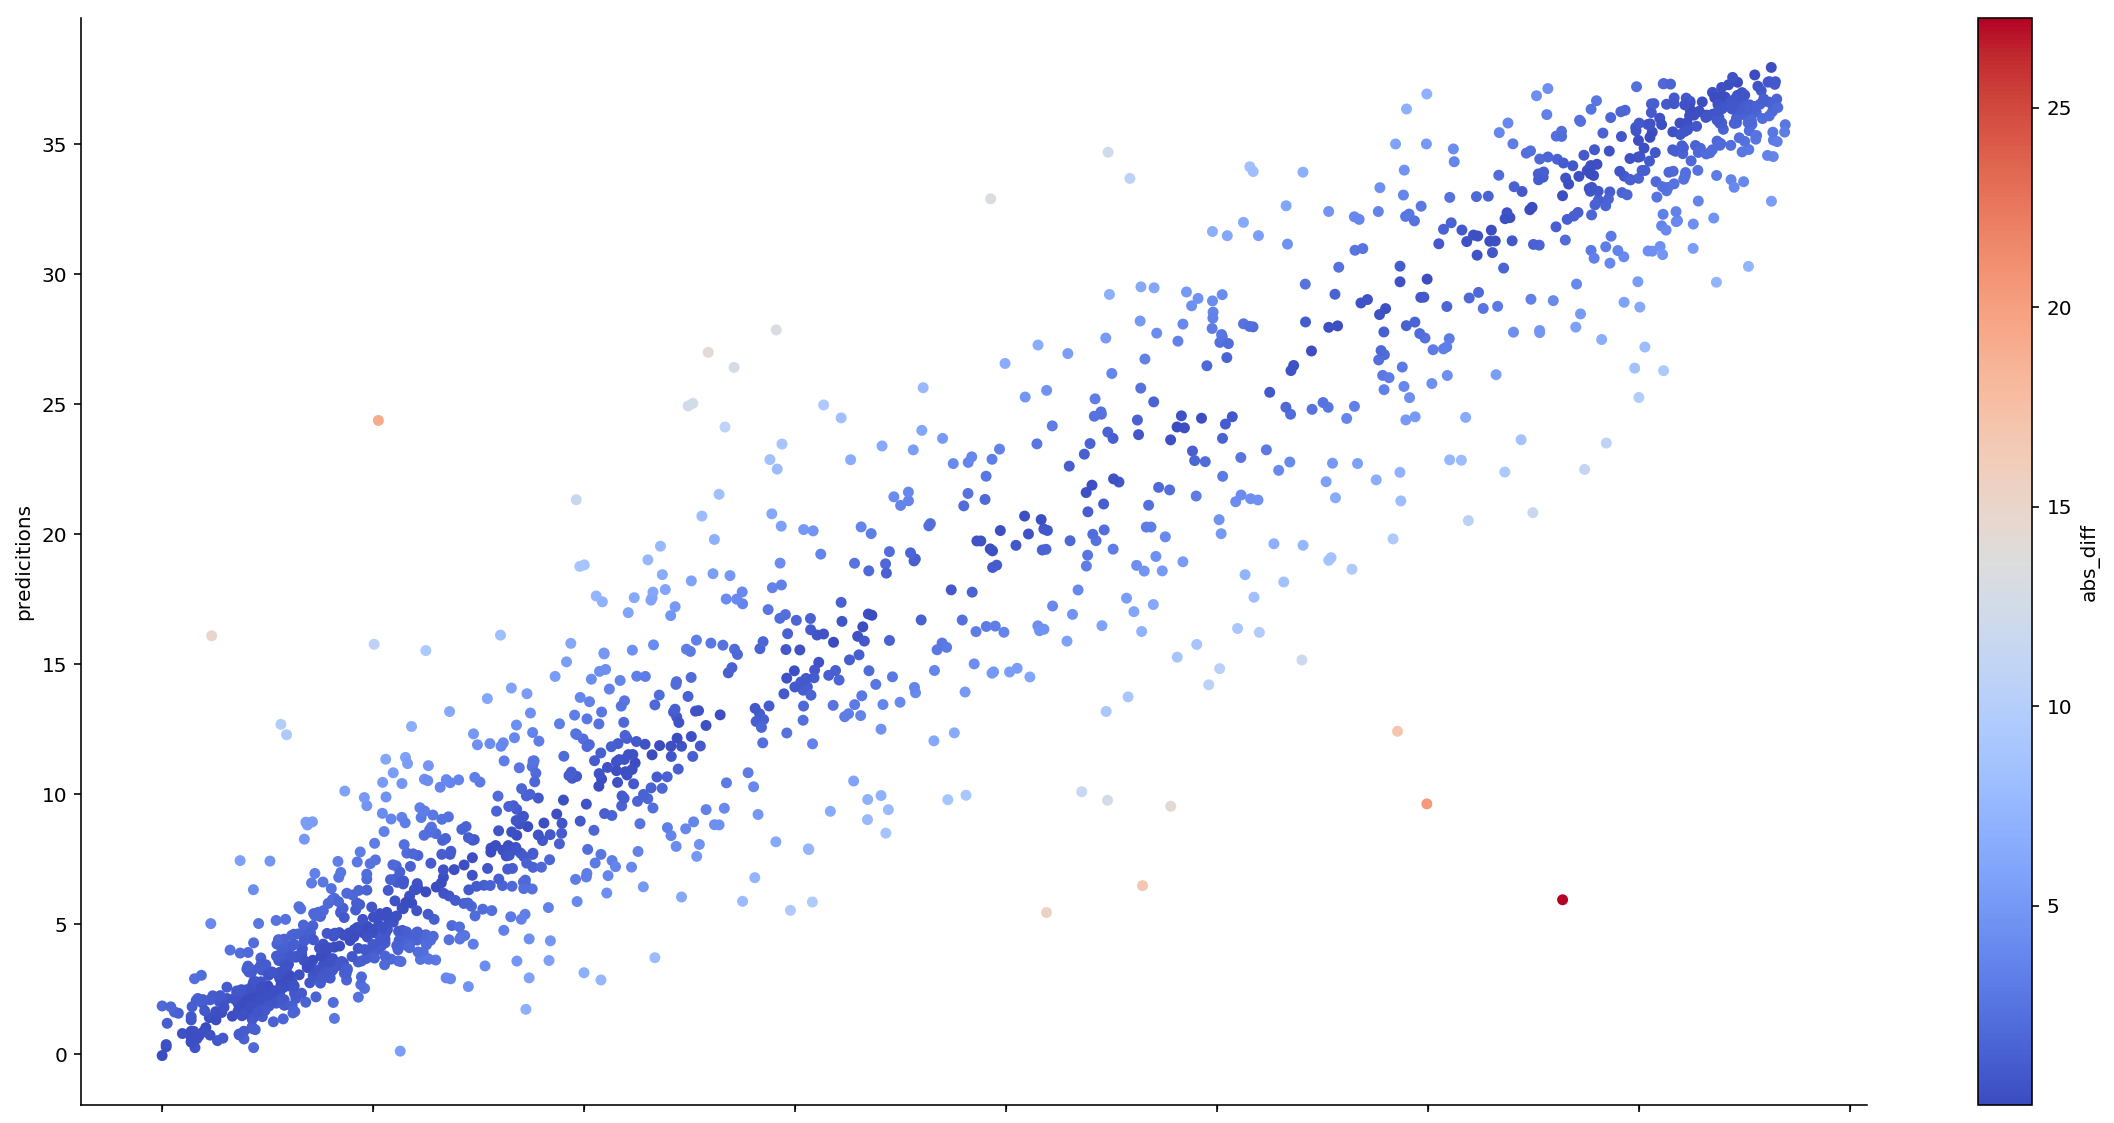

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

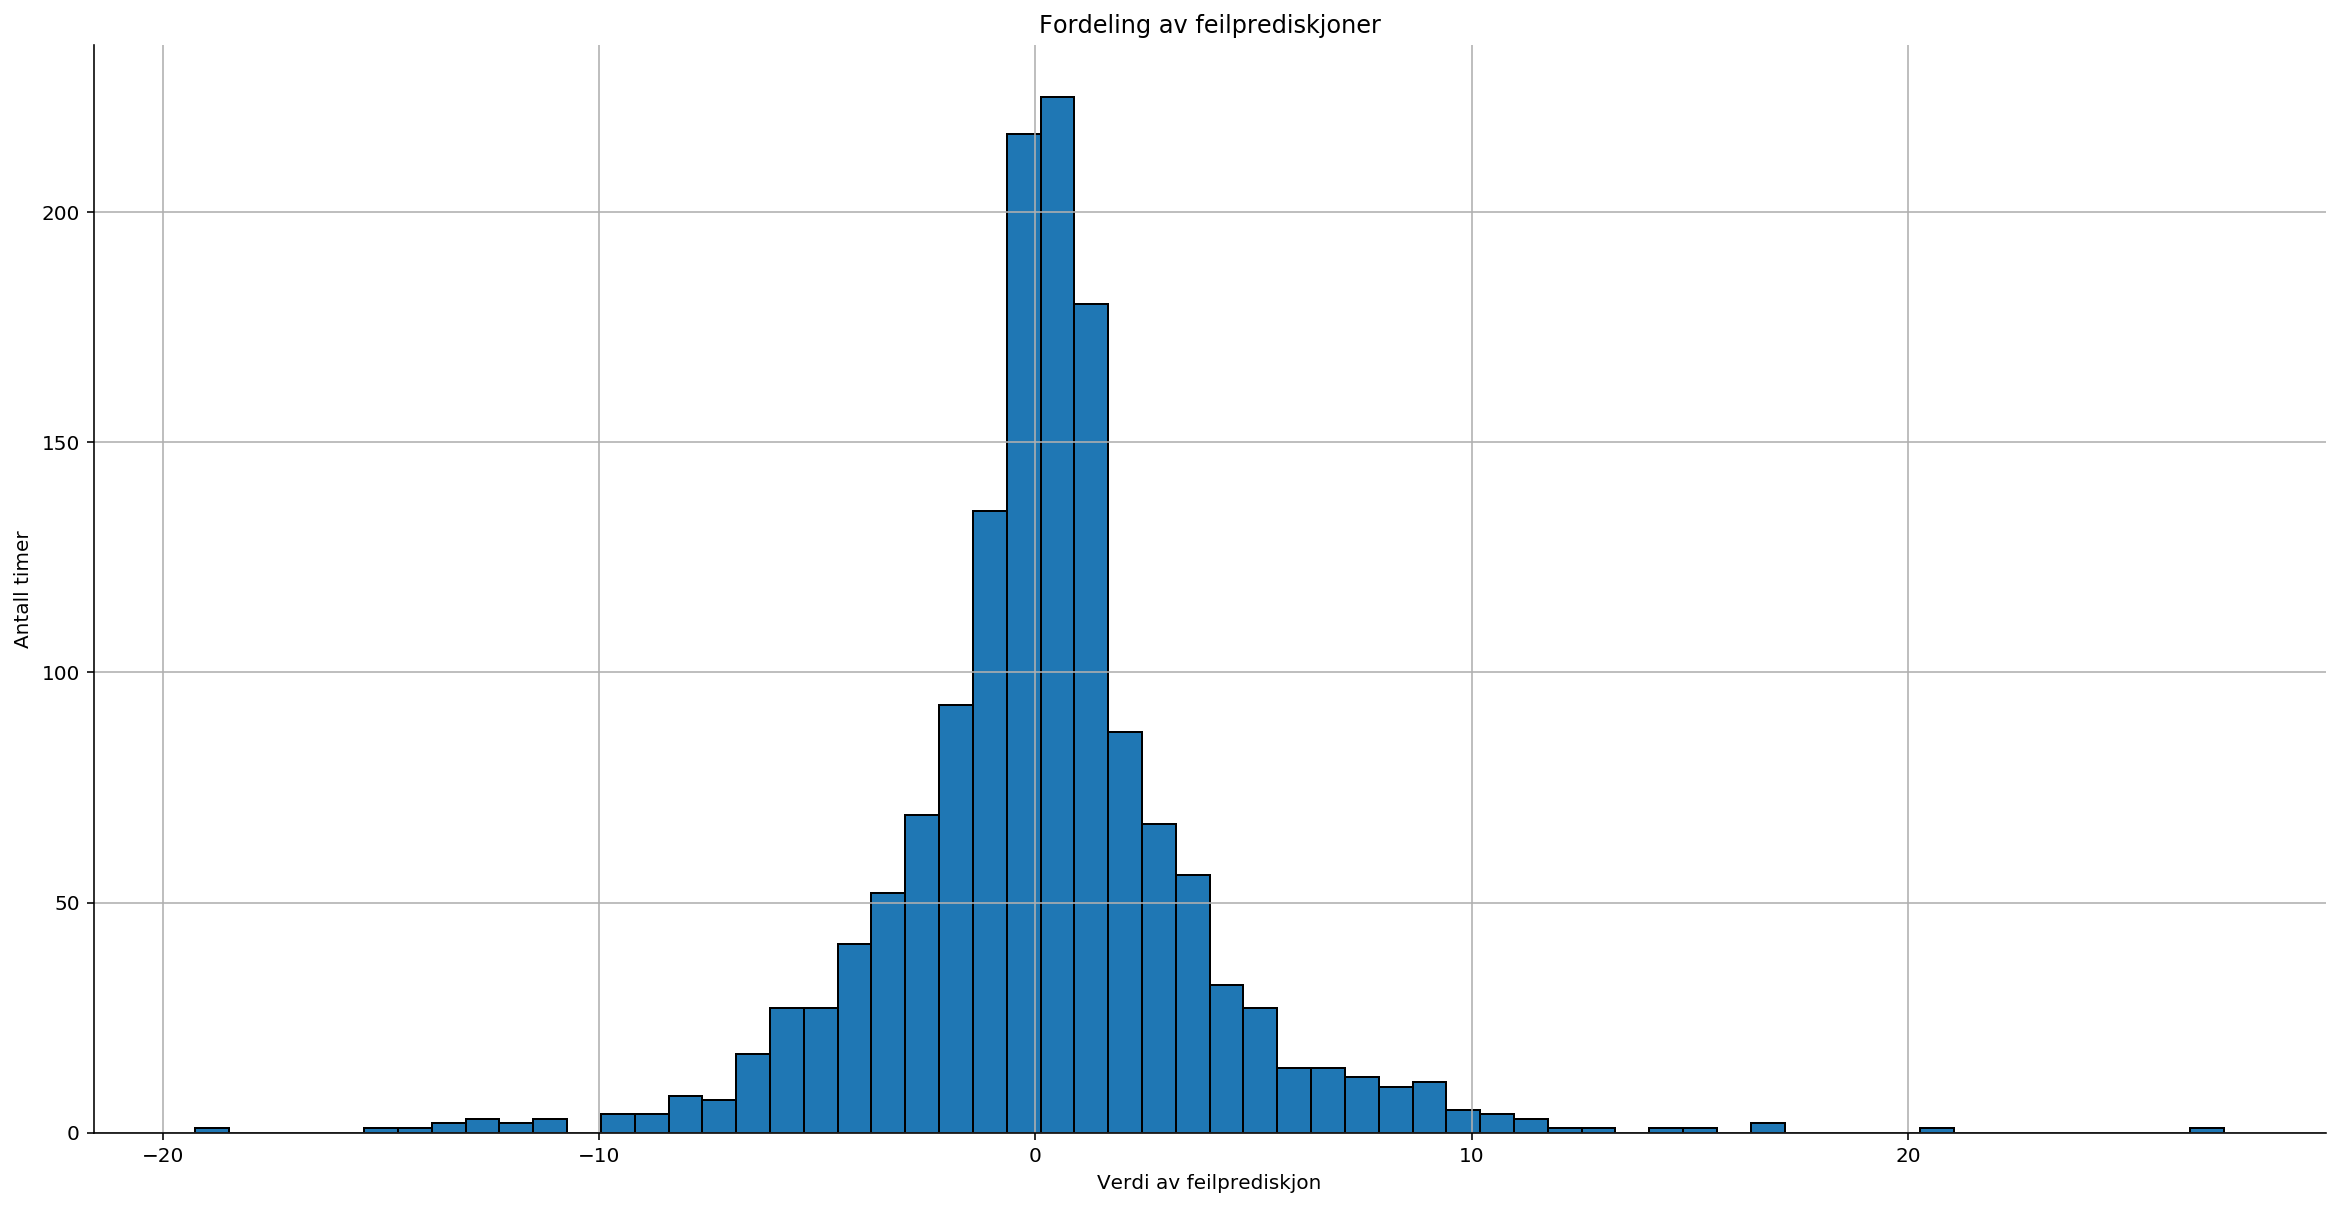

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

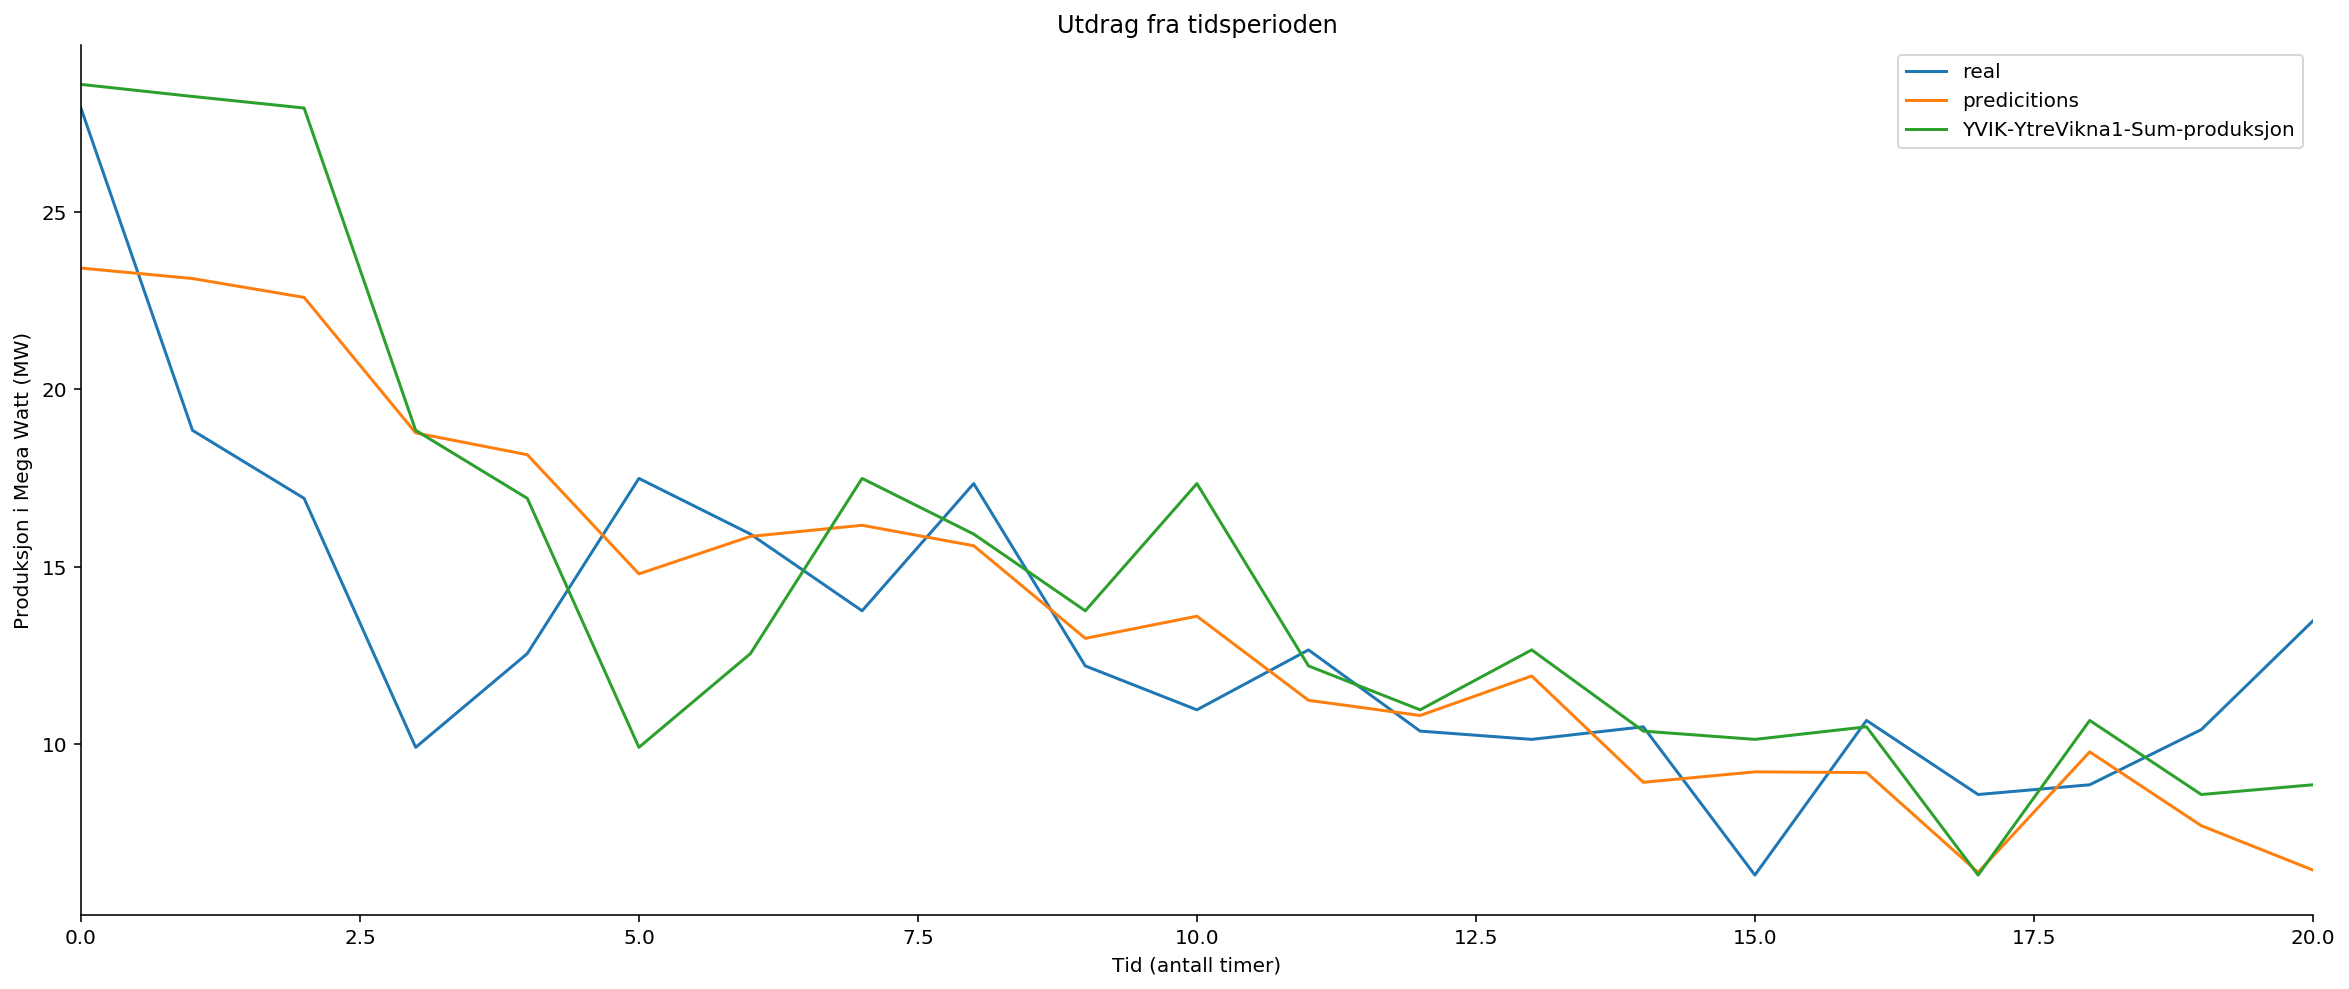

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')